C:\Users\lopis\AppData\Local\Temp\ipykernel_29728\3848482144.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("C:/MLCourse/My_Exercises/

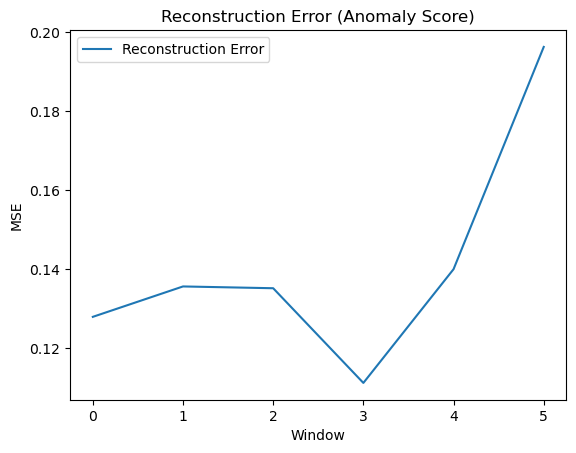

Anomalies at windows: [5]


In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from model import LSTMAutoencoder
from preprocessing import load_data, normalize_data, segment_windows

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def main():
    # Load and preprocess data
    df = load_data()
    if 'label' in df.columns:
        df = df.drop(columns=['label'])
    data_norm = normalize_data(df)
    windows = segment_windows(data_norm, window_size=5, step_size=1)  # Small window for small sample

    X = torch.tensor(windows, dtype=torch.float32).to(DEVICE)

    # Model params
    seq_len = X.shape[1]
    n_features = X.shape[2]
    embedding_dim = 64

    # Load model
    model = LSTMAutoencoder(seq_len, n_features, embedding_dim).to(DEVICE)
    model.load_state_dict(torch.load("C:/MLCourse/My_Exercises/Autonomous System/Data/lstm_autoencoder.pth"))
    model.eval()

    # Reconstruction error for each window
    with torch.no_grad():
        reconstructed = model(X)
        mse = torch.mean((X - reconstructed) ** 2, dim=(1,2)).cpu().numpy()
    
    # Visualize reconstruction error
    plt.plot(mse, label='Reconstruction Error')
    plt.xlabel('Window')
    plt.ylabel('MSE')
    plt.title('Reconstruction Error (Anomaly Score)')
    plt.legend()
    plt.show()

    # Flag anomalies (simple threshold for demo)
    threshold = np.percentile(mse, 95)
    anomalies = mse > threshold
    print(f"Anomalies at windows: {np.where(anomalies)[0]}")

if __name__ == "__main__":
    main()